## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Team Members

Luis Alejandro Aguilar Díaz - A01795362

Pablo Yamamoto Magaña - A01022382

Gabriel Paredes Garza - A00797698

Abril Cota - A01795114

Daniel Guzmán Ávila - A00781387


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


#### Install libraries (if needed)

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

In [1]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/1

In [2]:
!pip install scipy==1.9.3
!pip install scikit-plot
#you may receive a message of restarting session, this is OK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.9.3 which is incompatible.
jax 0.4.33 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
jaxlib 0.4.33 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.


In [1]:
!pip install portalocker
#please restar session after this intallation. After restarting go straight to importing the libraries

## Import libraries

In [2]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import gc

In [19]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

This cell loads the AG_NEWS dataset that comes from the torchtext library we set up on the fourth code cell of this notebook.

*   Our first line loads AG_NEWS as a tuple containing the training dataset and the test dataset
*   Our second line MAPS the datasets as dictionaries, to_map_style_dataset() is a function that comes from torchtext https://pytorch.org/text/main/data_functional.html#to-map-style-dataset


In [3]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

This cell is a tokenizer that is already implemented on torchtext so we
dont need to implement a tokenizer on regex https://pytorch.org/text/stable/data_utils.html#get-tokenizer


In [4]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

Then we create a function that goes through all the data and applies the


tokenizer to the text

In [5]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

The folling cells creates a variable vocab and creates a vocabulary through and iterator , in this case our yield tokens function
https://pytorch.org/text/stable/vocab.html#build-vocab-from-iterator

Last line, assigns the default index (zero) to words that are unkwown (unk) (not in the english dictionary)

In [6]:
#test tokens
tokens = tokeniser('Welcome to TC5033')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


This is just a test of previous cells, the tokenizer is applied to the string "Welcome to TC033" and it returns two lists. Tokens come back in lowercase and TC5033 which is a token that corresponds to a word that does not exist in the english dictionary is correctly returned with index ZERO

In [7]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

This line creates a variable called NUM_TRAIN that is the integer of 90% percent of the number of values present on the training dataset. And NUM_VAL which is the difference between the total number of values on the training dataset and NUM_TRAIN. This will be used to create a validation dataset which will be generated by splitting the training dataset.

Next line splits the training and validation dataset by random sampling using the NUM values from the previous cells

In [8]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [9]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [10]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

Collate_batch is a function to batch the data. For each word x is created, which is the token and index. If a batch contains less than the max number of tokens, the remaining tokens are assigned zeroes. If the batch is bigger than the max token number it is truncated.

In [11]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

Labels are created using the same classification as the AG_NEWS dataset. Max tokens is the largest size a text sequence is allowed to be. batch size is the quantity of text sequences that will be processed each time during training.

In [12]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

Dataloader() is a function from pytorch that loads the dataset, defines batch size and tells the loader to use the collate function to go through each batch. The shuffle=true means the text samples in each batch are processed and loaded randomly and not in the original order of the dataset.

### Let us build our RNN model

In [13]:
EMBEDDING_SIZE = 64
NEURONS = 8
LAYERS = 2
NUM_CLASSES = len(labels)

In [14]:
class RNN_Model_1(nn.Module):
  """
    This class defines our RNN

    Attributes:
    ----------
    embedding : nn.Embedding
    rnn : nn.RNN
    fc : nn.Linear (fully connected)
  """
  def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        self.rnn = nn.RNN(input_size=embed_size, hidden_size=hidden, num_layers=layers, batch_first=True)
                        # You may use PyTorch nn.GRU(), nn.RNN(), or nn.LSTM()

        self.fc = nn.Linear(hidden, num_classes)

  def forward(self, x):
          # implement forward pass. This function will be called when executing the model
          # _, hidden = self.rnn(x)
          # out = hidden[-1, :, :]
          # out = self.fc(out)
          embeddings = self.embedding_layer(x)
          output, hidden = self.rnn(embeddings, torch.randn(LAYERS, len(x), NEURONS))
          out = self.fc(output[:,-1])
          return out

In [15]:
def accuracy(model, loader):
  """
  Params
    model = nn.Module
        Trained PyTorch model to eval
    loader = DataLoader
        DataLoader with the dataset
  """
  correct_count = 0
  total_count = 0
  cost = 0
  model.eval()
  model = model.to(device=device)
  with torch.no_grad():
        for i, (xi, yi) in enumerate(loader):
            xi = xi.to(device=device, dtype=torch.long)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost += (F.cross_entropy(scores, yi)).item()
            _, pred = scores.max(dim=1)
            correct_count += (pred == yi).sum()
            total_count += pred.size(0)
        return cost/i, float(correct_count)/total_count



In [16]:
def train(model, optimiser, epochs=100):
    """
 Trains the model using the provided optimizer and dataset loaders.

    ----------
    model : nn.Module the RNN model to be trained.
    optimiser : torch.optim.Optimizer
    epochs : numbers of epochs to train the model.

    """
    model = model.to(device=device)
    train_cost = 0.
    val_cost = 0.
    for epoch in range(epochs):
        train_correct_num  = 0.
        train_total = 0.
        train_cost_acum = 0
        for mb, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.long)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input= scores, target=yi)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            train_correct_num += (torch.argmax(scores, dim=1) == yi.squeeze()).sum()
            train_total += scores.size(0)

            train_cost_acum += cost.item()

        val_cost, val_acc = accuracy(model, val_loader)
        train_acc = float(train_correct_num)/train_total
        train_cost = train_cost_acum/mb
        # if epoch%20 == 0:
        print(f'Epoch:{epoch}, train cost: {train_cost:.6f}, val cost: {val_cost:.6f},'
                      f' train acc: {train_acc:.4f}, val acc: {val_acc:4f},')
                      #f' lr: {optimiser.param_groups[0]["lr"]:.6f}')

In [17]:
epochs = 20
lr = 0.001
# instantiate model
rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr)

In [20]:
train(rnn_model, optimiser, epochs)

Epoch:0, train cost: 1.385929, val cost: 1.331692, train acc: 0.2745, val acc: 0.385917,
Epoch:1, train cost: 1.179741, val cost: 1.139334, train acc: 0.4373, val acc: 0.468583,
Epoch:2, train cost: 1.060392, val cost: 1.045222, train acc: 0.4842, val acc: 0.497167,
Epoch:3, train cost: 0.945530, val cost: 0.910497, train acc: 0.5403, val acc: 0.583583,
Epoch:4, train cost: 0.810823, val cost: 0.822883, train acc: 0.6205, val acc: 0.620917,
Epoch:5, train cost: 0.732433, val cost: 0.797625, train acc: 0.6629, val acc: 0.643917,
Epoch:6, train cost: 0.681107, val cost: 0.777821, train acc: 0.6879, val acc: 0.653750,
Epoch:7, train cost: 0.643530, val cost: 0.749959, train acc: 0.7078, val acc: 0.683333,
Epoch:8, train cost: 0.609804, val cost: 0.740843, train acc: 0.7252, val acc: 0.681167,
Epoch:9, train cost: 0.587822, val cost: 0.727893, train acc: 0.7386, val acc: 0.701250,
Epoch:10, train cost: 0.559497, val cost: 0.722623, train acc: 0.7617, val acc: 0.717000,
Epoch:11, train cost

In [21]:
print(accuracy(rnn_model, test_loader))

(0.7120132466842388, 0.7946052631578947)


Defining a function to test our model

In [22]:
LABELS_MAP = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}


def sample_text(model, text):
    """
    Function to classify a sample text using the trained RNN model.

    Parameters:
    - model: Trained RNN model (RNN_Model_1)
    - text: A sample text to classify

    Returns:
    - Predicted class label (integer)
    """
    model.eval()
    tokens = tokeniser(text)
    indices = vocab(tokens)
    input_tensor = torch.tensor(indices, dtype=torch.long).unsqueeze(0).to(device)

    # Perform inference
    with torch.no_grad():
        output = model(input_tensor)
        predicted_label_index = torch.argmax(output, dim=1).item()

    predicted_label = LABELS_MAP.get(predicted_label_index, "Unknown")


    return predicted_label

Testing Our model

In [23]:
example_text = "President-elect Donald Trump’s return to the White House already carried the potential for sweeping changes to the Federal Reserve. "

In [24]:
predicted_label = sample_text(rnn_model, example_text)
print(f"Predicted Label: {predicted_label}")

Predicted Label: Sci/Tech


In [25]:
example_text2 = "U.S. Farmers Brace for New Trump Trade Wars Amid Tariff Threats Despite their concerns, some farm operators still support the former president and prefer his overall economic plan."

In [26]:
predicted_label = sample_text(rnn_model, example_text2)
print(f"Predicted Label: {predicted_label}")

Predicted Label: World


In [27]:
example_text3 = "Ohtani hit .310, stole 59 bases and led the NL with 54 homers and 130 RBIs exclusively as a designated hitter, becoming the first player with 50 or more homers and 50 or more stolen bases in a season. He helped the Dodgers to the World Series title, playing the final three games with a torn labrum in his left shoulder."

In [28]:
predicted_label = sample_text(rnn_model, example_text3)
print(f"Predicted Label: {predicted_label}")

Predicted Label: Sports


Create a confusion matrix

In [29]:
import matplotlib.pyplot as plt

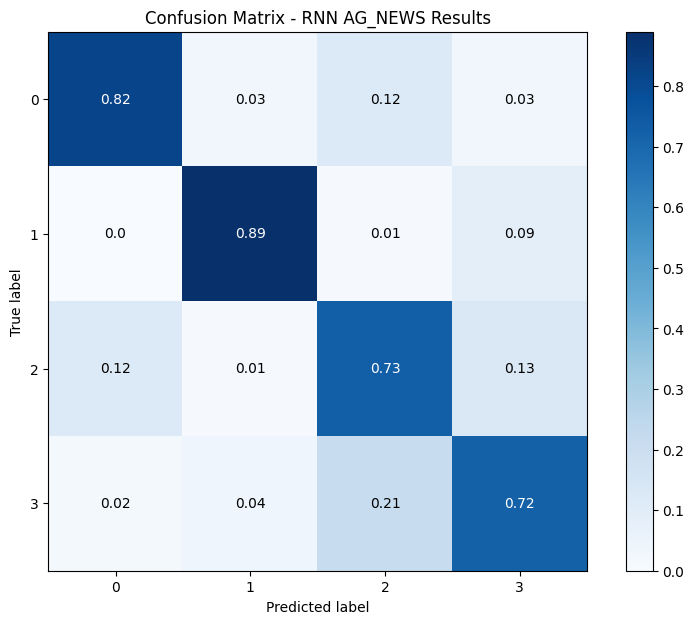

In [30]:
def plot_confusion_matrix(model, loader):
    """
    Function to generate and plot a confusion matrix for the trained model using scikitplot.

    Parameters:
    - model: Trained PyTorch model
    - loader: DataLoader for the test dataset

    Returns:
    - None (displays the confusion matrix plot)
    """
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for texts, labels in loader:
            # Select CPU %% GPU, this was completed in a free colab notebook
            texts = texts.to(device, dtype=torch.long)
            labels = labels.to(device)
            # Get model predictions
            outputs = model(texts)
            preds = torch.argmax(outputs, dim=1)
            # Store predictions and true labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    # Plot the confusion matrix using scikitplot
    skplt.metrics.plot_confusion_matrix(
        all_labels, all_preds,
        normalize=True,
        figsize=(10, 7),
        cmap='Blues'
    )
    plt.title("Confusion Matrix - RNN AG_NEWS Results")
    plt.show()

    # Garbage collector for memory (OPTIONAL, we used it because it was a suggested library and good practice)
    gc.collect()

plot_confusion_matrix(rnn_model, test_loader)
